In [121]:
import practicalSPARQL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import practicalSPARQL
import numpy as np
from collections import Counter
import practicalSPARQL

In [122]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [123]:
q = practicalSPARQL.stringify_SPARQL('textparts_and_books_250724.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [124]:
# Count the number of unique values in the column
unique_count = df['book'].nunique()

# Print the count of unique values
print(f'The number of unique values: {unique_count}')

The number of unique values: 359


In [125]:
#all adaption of 100
q = practicalSPARQL.stringify_SPARQL('adaptions_100.sparql')
df_adaptions_100 = sparql.select_as_dataframe(q) 

In [126]:
#all influenced by 100
q = practicalSPARQL.stringify_SPARQL('influenced_100.sparql')
df_influenced_100 = sparql.select_as_dataframe(q) 

In [127]:
#all adaption of 104
q = practicalSPARQL.stringify_SPARQL('adaptions_104.sparql')
df_adaptions_104 = sparql.select_as_dataframe(q) 

In [128]:
#all influenced by 104
q = practicalSPARQL.stringify_SPARQL('Influenced_104.sparql')
df_influenced_104 = sparql.select_as_dataframe(q) 

In [129]:
# Assuming df is your main DataFrame and the other DataFrames are named accordingly
# Extract sets of unique identifiers from each DataFrame
adaptions_100_set = set(df_adaptions_100['custom_identifier'])
adaptions_104_set = set(df_adaptions_104['custom_identifier'])
influenced_100_set = set(df_influenced_100['custom_identifier'])
influenced_104_set = set(df_influenced_104['custom_identifier'])

# Create a new column 'part_type' and initialize with 'other'
df['part_type'] = 'other'

# Define a function to determine 'part_type'
def determine_part_type(identifier):
    if identifier == '100':
        return '100'
    elif identifier == '104':
        return '104'
    elif identifier in adaptions_100_set:
        return 'adaption_100'
    elif identifier in adaptions_104_set:
        return 'adaption_104'
    elif identifier in influenced_100_set:
        return 'influenced_100'
    elif identifier in influenced_104_set:
        return 'influenced_104'
    else:
        return 'other'

# Apply the function to the 'custom_identifier' column
df['part_type'] = df['custom_identifier'].apply(determine_part_type)

In [130]:
df

,book,book_label,bid,custom_identifier,label,subject,title,period,part_type_labels,dataset_labels,corpora_labels,part_type
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,100,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,Late Middle Ages,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,100
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,240,Paratext: Dedication letter to Anton Müller by...,http://sphaera.mpiwg-berlin.mpg.de/id/part/ec2...,Magnae pietatis et eruditionis viro D. Antonio...,Early Modern Period-2,"Original Part, Paratext – Dedication Letter",Sphaera Sacrobosco,S. Tractatus,other
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,291,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,&nbsp;,Early Modern Period-2,"Annotated, Content",Sphaera Sacrobosco,S. Tractatus,adaption_100
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,Sphaera Petri Catena,1597,100,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,Late Middle Ages,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,100
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,Sphaera Petri Catena,1597,310,Paratext: Dedication letter of P. Catena to th...,http://sphaera.mpiwg-berlin.mpg.de/id/part/44d...,"Divae iustinae eximiae pietatis monachis, bona...",Early Modern Period-2,"Original Part, Paratext – Letter to the reader...",Sphaera Sacrobosco,S. Tractatus,other
...,...,...,...,...,...,...,...,...,...,...,...,...
2724,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,377,Elements of Astronomy,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Liber de aggregatione stellarum,Early Middle Ages,"Translation, Content",Sphaera Sacrobosco,S. Tractatus,other
2725,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,415,On Climate Zones by Nunes and translated into ...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,On Climate Zones by Nunes and translated into ...,Early Modern Period-2,"Translation, Content",Sphaera Sacrobosco,S. Tractatus,other
2726,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,434,Almagest,http://sphaera.mpiwg-berlin.mpg.de/id/part/591...,Mαθηματική σύνταξις,Antiquity,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,other
2727,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,938,Vinet 1569 - Commentary on Treatise on the Sph...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Ioannis de Sacro Bosco proemium in suam Sphaeram,Early Modern Period-2,"Annotated, Content",Sphaera Sacrobosco,S. Tractatus,adaption_100


In [131]:
# Merge the DataFrames on 'bid'
df = df.merge(all_books[['bid', 'year', 'place']], how='left', on='bid')

In [132]:
df

,book,book_label,bid,custom_identifier,label,subject,title,period,part_type_labels,dataset_labels,corpora_labels,part_type,year,place
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,100,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,Late Middle Ages,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,100,1550,Wittenberg
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,240,Paratext: Dedication letter to Anton Müller by...,http://sphaera.mpiwg-berlin.mpg.de/id/part/ec2...,Magnae pietatis et eruditionis viro D. Antonio...,Early Modern Period-2,"Original Part, Paratext – Dedication Letter",Sphaera Sacrobosco,S. Tractatus,other,1550,Wittenberg
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f5...,Quaestiones novae in libellum de sphaera Johan...,1594,291,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,&nbsp;,Early Modern Period-2,"Annotated, Content",Sphaera Sacrobosco,S. Tractatus,adaption_100,1550,Wittenberg
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,Sphaera Petri Catena,1597,100,Tractatus de sphaera,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,Late Middle Ages,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,100,1561,Padua
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,Sphaera Petri Catena,1597,310,Paratext: Dedication letter of P. Catena to th...,http://sphaera.mpiwg-berlin.mpg.de/id/part/44d...,"Divae iustinae eximiae pietatis monachis, bona...",Early Modern Period-2,"Original Part, Paratext – Letter to the reader...",Sphaera Sacrobosco,S. Tractatus,other,1561,Padua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,377,Elements of Astronomy,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Liber de aggregatione stellarum,Early Middle Ages,"Translation, Content",Sphaera Sacrobosco,S. Tractatus,other,1582,Antwerp
2725,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,415,On Climate Zones by Nunes and translated into ...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,On Climate Zones by Nunes and translated into ...,Early Modern Period-2,"Translation, Content",Sphaera Sacrobosco,S. Tractatus,other,1582,Antwerp
2726,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,434,Almagest,http://sphaera.mpiwg-berlin.mpg.de/id/part/591...,Mαθηματική σύνταξις,Antiquity,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus,other,1582,Antwerp
2727,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,Sphaera Ioannis de Sacro Bosco emendata,2281,938,Vinet 1569 - Commentary on Treatise on the Sph...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Ioannis de Sacro Bosco proemium in suam Sphaeram,Early Modern Period-2,"Annotated, Content",Sphaera Sacrobosco,S. Tractatus,adaption_100,1582,Antwerp


In [133]:
# Count the number of unique values in the column
unique_count = df['bid'].nunique()

# Print the count of unique values
print(f'The number of unique values: {unique_count}')

The number of unique values: 359


part_type       100  104  adaption_100  adaption_104  influenced_100  other
year_interval                                                              
1470-1489      14.0  3.0           1.0           0.0             0.0    7.0
1490-1509      37.0  6.0          29.0           2.0             0.0   29.0
1510-1529      30.0  6.0          26.0           3.0             1.0   27.0
1530-1549      48.0  2.0          29.0           2.0             8.0   48.0
1550-1569      88.0  1.0          48.0           1.0            48.0   88.0
1570-1589      69.0  2.0          30.0           2.0            44.0   69.0
1590-1609      45.0  0.0          24.0           0.0            25.0   45.0
1610-1629      23.0  0.0          13.0           0.0            13.0   23.0
1630-1649       4.0  0.0           2.0           0.0             1.0    4.0


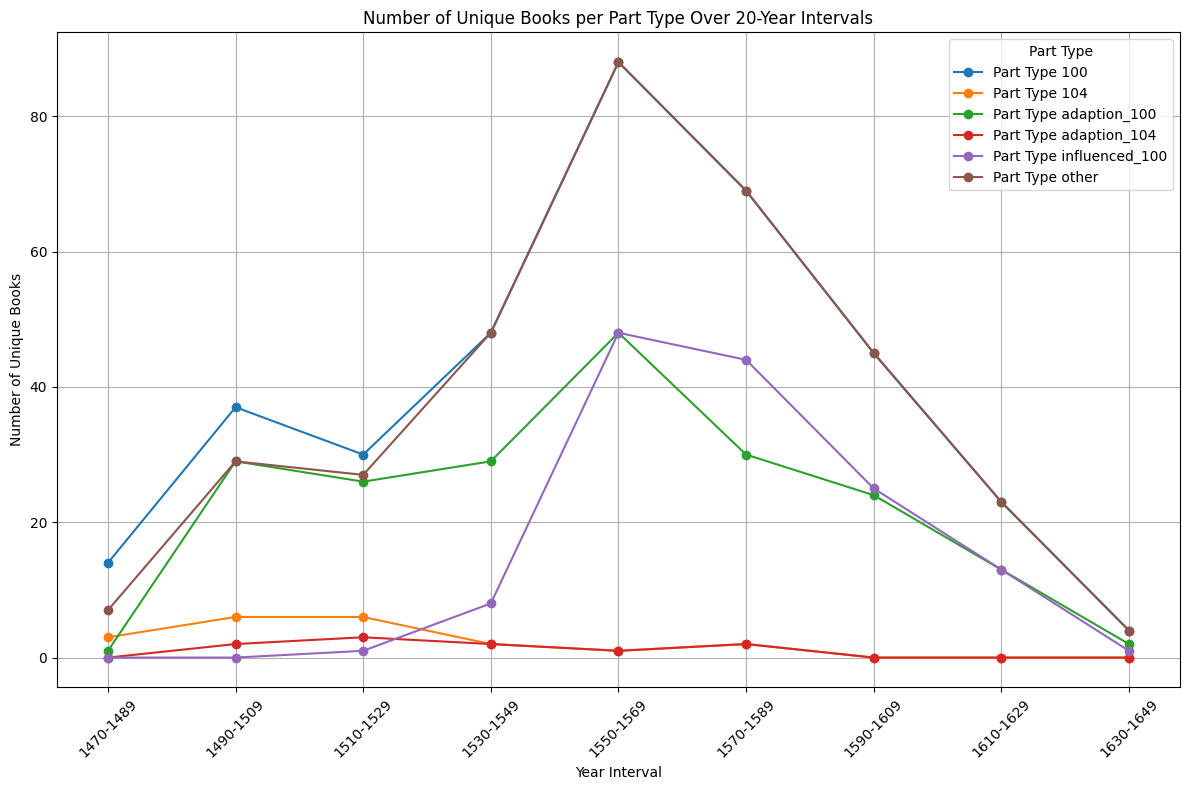

In [134]:
# Define bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and part_type, and count unique book values (bids)
grouped = df.groupby(['year_interval', 'part_type'], observed=True)['bid'].nunique().reset_index(name='unique_books')

# Pivot table to prepare for plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='unique_books').fillna(0)

# Verify the pivot DataFrame
print(pivot_df)

# Plotting
plt.figure(figsize=(12, 8))
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

plt.title('Number of Unique Books per Part Type Over 20-Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Part Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
# Filter the DataFrame for part_type 104
filtered_df = df[df['part_type'] == 104  ]

In [141]:
filtered_df

,book,book_label,bid,custom_identifier,label,subject,title,period,part_type_labels,dataset_labels,corpora_labels,part_type,year,place,year_interval


In [142]:
# Print unique values in the 'part_type' column
unique_part_types = df['part_type'].unique()

print(unique_part_types)

['100' 'other' 'adaption_100' 'influenced_100' '104' 'adaption_104']


In [143]:
filtered_df = df[df['part_type'] == '104']

In [144]:
filtered_df

,book,book_label,bid,custom_identifier,label,subject,title,period,part_type_labels,dataset_labels,corpora_labels,part_type,year,place,year_interval
18,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,Commentum super tractatum sphaerae mundi,1622,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1494,Venice,1490-1509
48,http://sphaera.mpiwg-berlin.mpg.de/id/item/776...,Spherae Mundi,1650,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1513,Venice,1510-1529
63,http://sphaera.mpiwg-berlin.mpg.de/id/item/814...,Sphera cum commentis in hoc volumine contentis.,1659,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Theoricae Peurbach, Theoricae Gerard, Sphaera ...",S. Tractatus & Theoricae,104,1518,Venice,1510-1529
720,http://sphaera.mpiwg-berlin.mpg.de/id/item/798...,Nota eorum quæ in hoc libro continentur,1823,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Theoricae Peurbach, Sphaera Sacrobosco",S. Tractatus & Theoricae,104,1508,Venice,1490-1509
750,http://sphaera.mpiwg-berlin.mpg.de/id/item/f55...,Sphera Mundi,1826,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1499,Venice,1490-1509
1277,http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...,Tratado da sphera,1910,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1537,Lisbon,1530-1549
1328,http://sphaera.mpiwg-berlin.mpg.de/id/item/6c8...,Opusculum de Sphaera clarissimi philosophi Ioa...,1918,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content",Sphaera Sacrobosco,S. Tractatus & Theoricae,104,1518,Vienna,1510-1529
1353,http://sphaera.mpiwg-berlin.mpg.de/id/item/744...,Novicijs adolescentibus,1923,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1482,Venice,1470-1489
1356,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,Spaerae Mundi Compendium foeliciter inchoat,1924,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1488,Venice,1470-1489
1361,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,Sphaerae mundi compendium foeliciter inchoat,1925,104,Theoricae novae planetarum of Peurbach,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum Georgii Purbachii a...,Early Modern Period-1,"Original Part, Content","Sphaera Sacrobosco, Theoricae Peurbach",S. Tractatus & Theoricae,104,1490,Venice,1490-1509


In [145]:
# Count the number of unique values in the column
unique_count = filtered_df['bid'].nunique()

# Print the count of unique values
print(f'The number of unique values: {unique_count}')

The number of unique values: 20


C:\Users\nogas\AppData\Local\Temp\ipykernel_22864\1938833126.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books = df.groupby('year_interval')['bid'].nunique().reset_index(name='unique_books')


part_type       100  104  Total  adaption_100  adaption_104  influenced_100  \
year_interval                                                                 
1470-1489      14.0  3.0   14.0           1.0           0.0             0.0   
1490-1509      37.0  6.0   37.0          29.0           2.0             0.0   
1510-1529      30.0  6.0   30.0          26.0           3.0             1.0   
1530-1549      48.0  2.0   48.0          29.0           2.0             8.0   
1550-1569      88.0  1.0   88.0          48.0           1.0            48.0   
1570-1589      69.0  2.0   69.0          30.0           2.0            44.0   
1590-1609      45.0  0.0   45.0          24.0           0.0            25.0   
1610-1629      23.0  0.0   23.0          13.0           0.0            13.0   
1630-1649       4.0  0.0    4.0           2.0           0.0             1.0   

part_type      other  
year_interval         
1470-1489        7.0  
1490-1509       29.0  
1510-1529       27.0  
1530-1549      

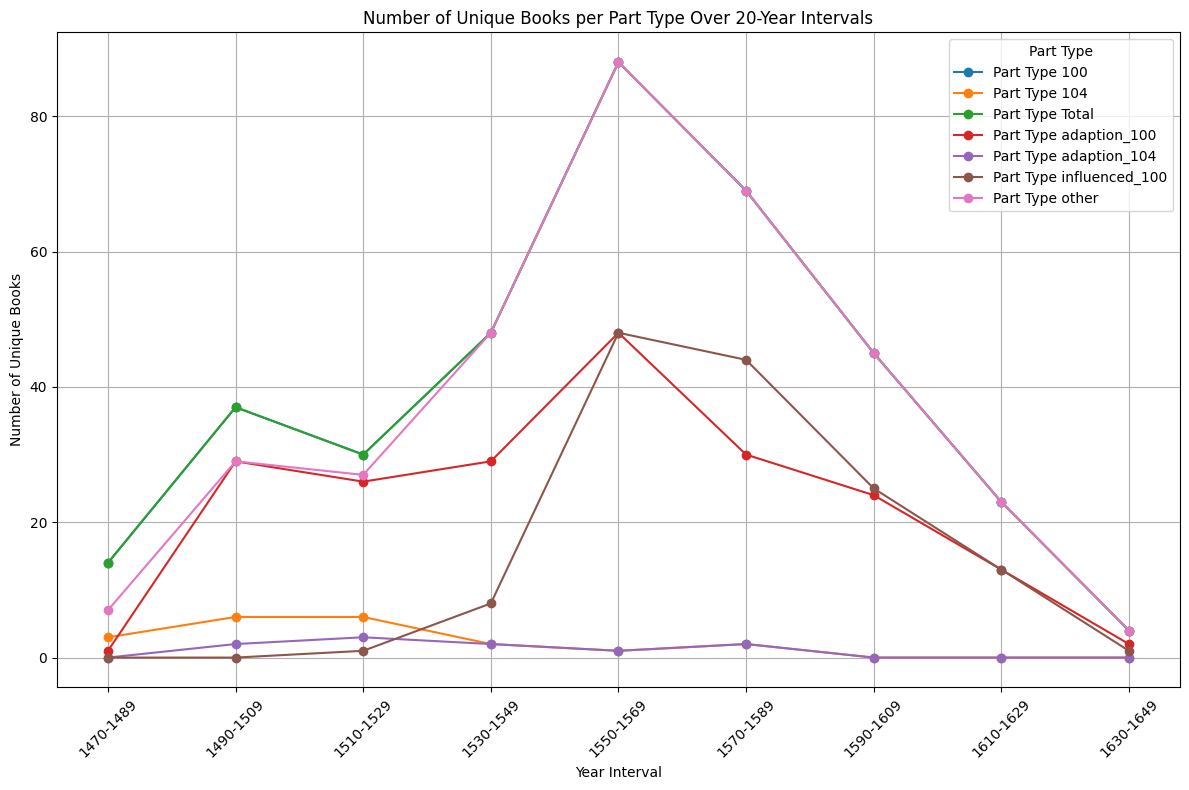

In [146]:
# Define bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and part_type, and count unique book values (bids)
grouped = df.groupby(['year_interval', 'part_type'], observed=True)['bid'].nunique().reset_index(name='unique_books')

# Calculate total unique books for each interval
total_unique_books = df.groupby('year_interval')['bid'].nunique().reset_index(name='unique_books')
total_unique_books['part_type'] = 'Total'

# Combine the data
combined = pd.concat([grouped, total_unique_books])

# Pivot table to prepare for plotting
pivot_df = combined.pivot(index='year_interval', columns='part_type', values='unique_books').fillna(0)

# Verify the pivot DataFrame
print(pivot_df)

# Plotting
plt.figure(figsize=(12, 8))
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

plt.title('Number of Unique Books per Part Type Over 20-Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Part Type')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_22864\3318225806.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books = df.groupby('year_interval')['bid'].nunique().reset_index(name='unique_books')


part_type       100  104  Total  adaption_100  adaption_104  influenced_100
year_interval                                                              
1470-1489      14.0  3.0   14.0           1.0           0.0             0.0
1490-1509      37.0  6.0   37.0          29.0           2.0             0.0
1510-1529      30.0  6.0   30.0          26.0           3.0             1.0
1530-1549      48.0  2.0   48.0          29.0           2.0             8.0
1550-1569      88.0  1.0   88.0          48.0           1.0            48.0
1570-1589      69.0  2.0   69.0          30.0           2.0            44.0
1590-1609      45.0  0.0   45.0          24.0           0.0            25.0
1610-1629      23.0  0.0   23.0          13.0           0.0            13.0
1630-1649       4.0  0.0    4.0           2.0           0.0             1.0


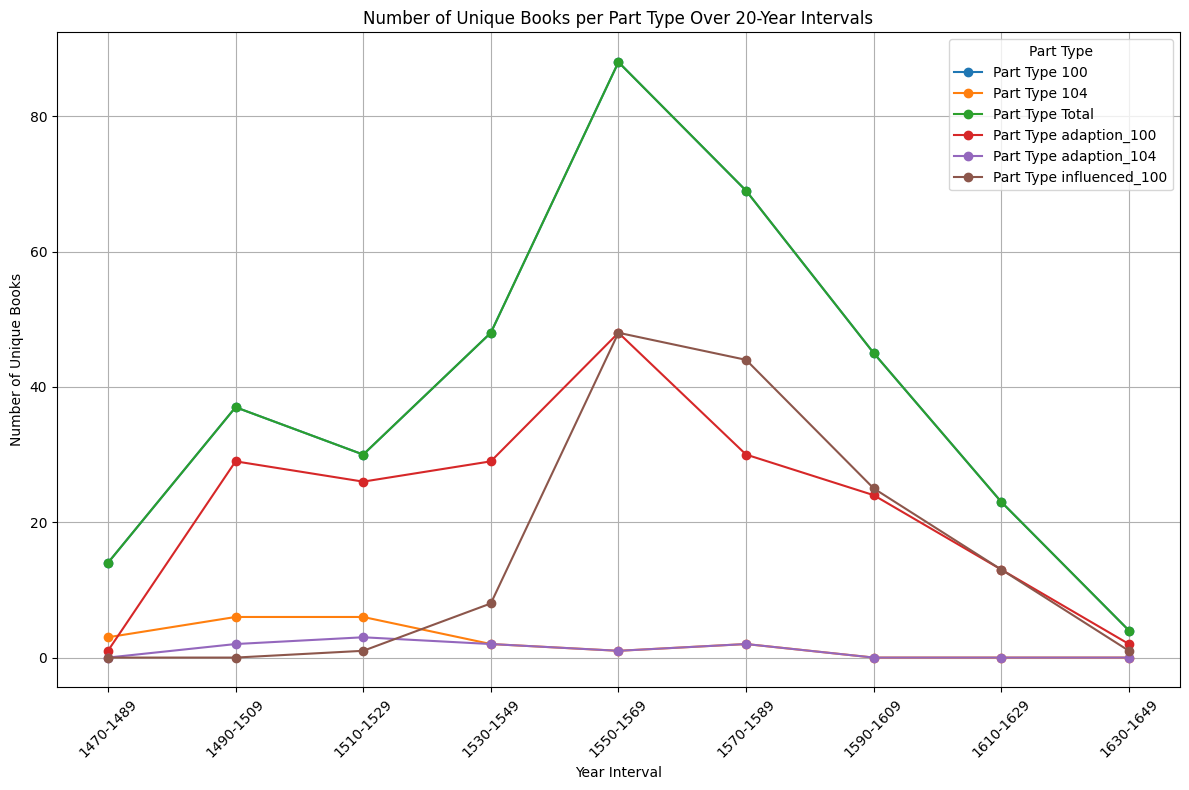

In [147]:
# Define bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by year_interval and part_type, and count unique book values (bids)
grouped = df.groupby(['year_interval', 'part_type'], observed=True)['bid'].nunique().reset_index(name='unique_books')

# Filter out part_type 'other'
grouped = grouped[grouped['part_type'] != 'other']

# Calculate total unique books for each interval
total_unique_books = df.groupby('year_interval')['bid'].nunique().reset_index(name='unique_books')
total_unique_books['part_type'] = 'Total'

# Combine the data
combined = pd.concat([grouped, total_unique_books])

# Pivot table to prepare for plotting
pivot_df = combined.pivot(index='year_interval', columns='part_type', values='unique_books').fillna(0)

# Verify the pivot DataFrame
print(pivot_df)

# Plotting
plt.figure(figsize=(12, 8))
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

plt.title('Number of Unique Books per Part Type Over 20-Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Part Type')
plt.grid(True)
plt.tight_layout()
plt.show()